In [23]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load data

In [24]:
path_to_file = 'house-prices.csv'
df = pd.read_csv(path_to_file)
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [25]:
print(df.describe().round(2).T)

           count       mean       std      min        25%       50%  \
Home       128.0      64.50     37.09      1.0      32.75      64.5   
Price      128.0  130427.34  26868.77  69100.0  111325.00  125950.0   
SqFt       128.0    2000.94    211.57   1450.0    1880.00    2000.0   
Bedrooms   128.0       3.02      0.73      2.0       3.00       3.0   
Bathrooms  128.0       2.45      0.51      2.0       2.00       2.0   
Offers     128.0       2.58      1.07      1.0       2.00       3.0   

                 75%       max  
Home           96.25     128.0  
Price      148250.00  211200.0  
SqFt         2140.00    2590.0  
Bedrooms        3.00       5.0  
Bathrooms       3.00       4.0  
Offers          3.00       6.0  


In [26]:
df = df.drop('Home', axis=1)
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df = pd.get_dummies(df, columns=['Neighborhood'])
df

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,0,1,0,0
1,114200,2030,4,2,3,0,1,0,0
2,114800,1740,3,2,1,0,1,0,0
3,94700,1980,3,2,3,0,1,0,0
4,119800,2130,3,3,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,1,1,0,0
124,147900,2160,4,3,3,1,1,0,0
125,113500,2070,2,2,2,0,0,1,0
126,149900,2020,3,3,1,0,0,0,1


# Visualize relationships between predictor variables and response variable using regression plots and heatmap

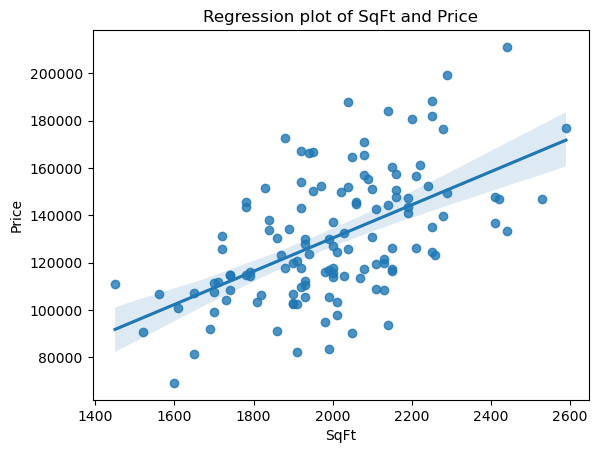

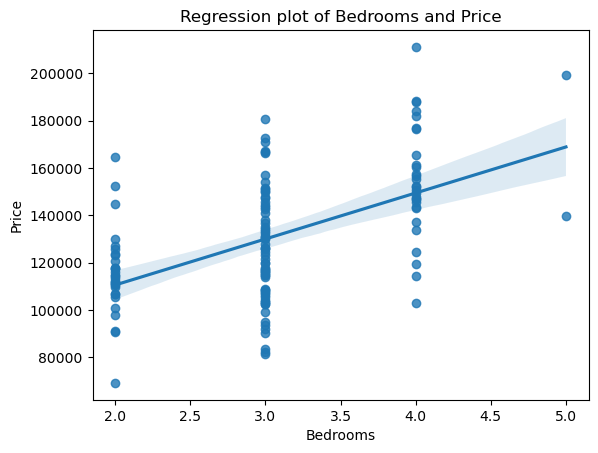

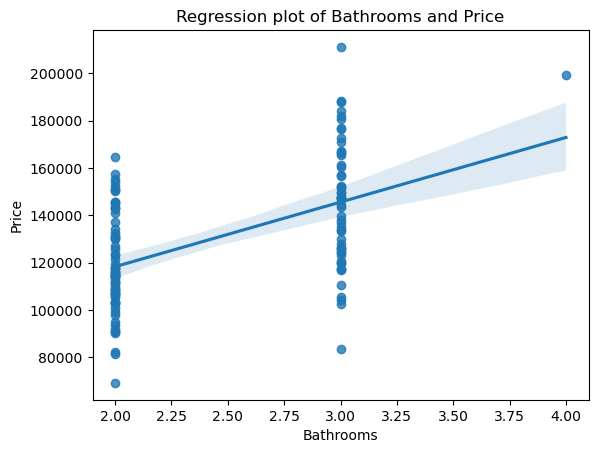

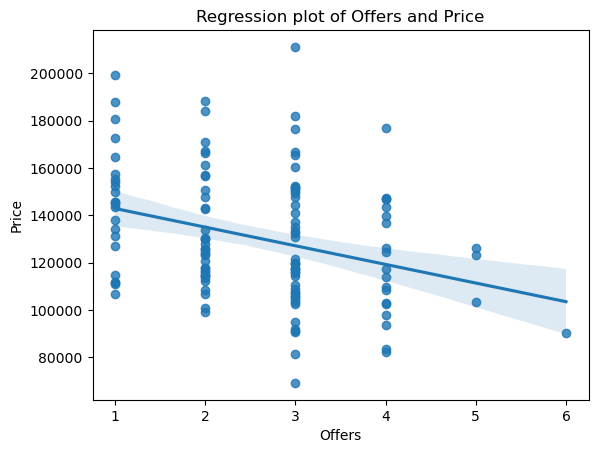

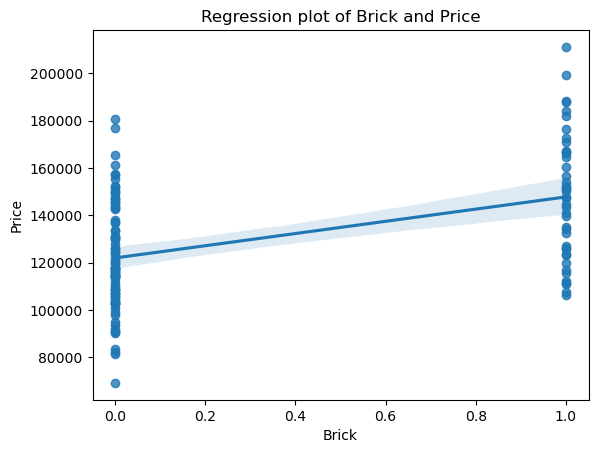

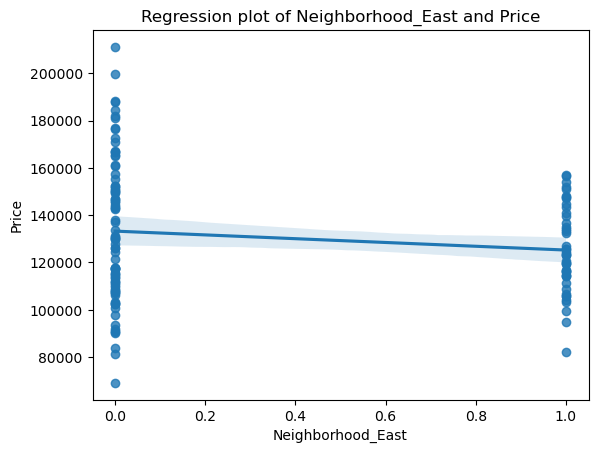

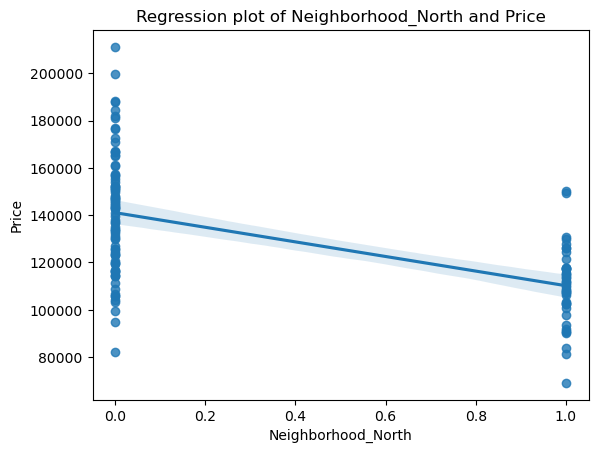

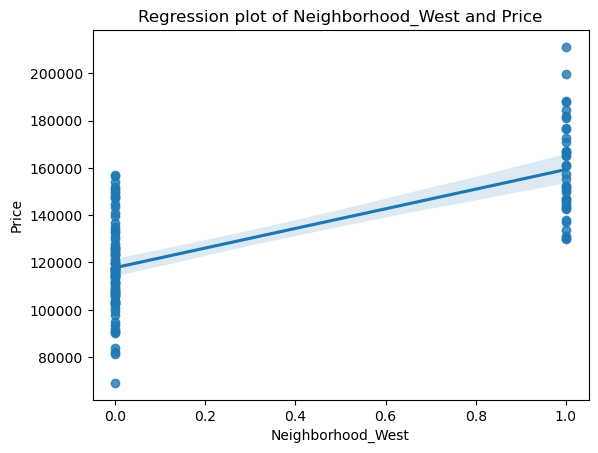

In [28]:
import seaborn as sns 

variables = ['SqFt', 'Bedrooms', 'Bathrooms','Offers','Brick','Neighborhood_East','Neighborhood_North','Neighborhood_West']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Price', data=df).set(title=f'Regression plot of {var} and Price');

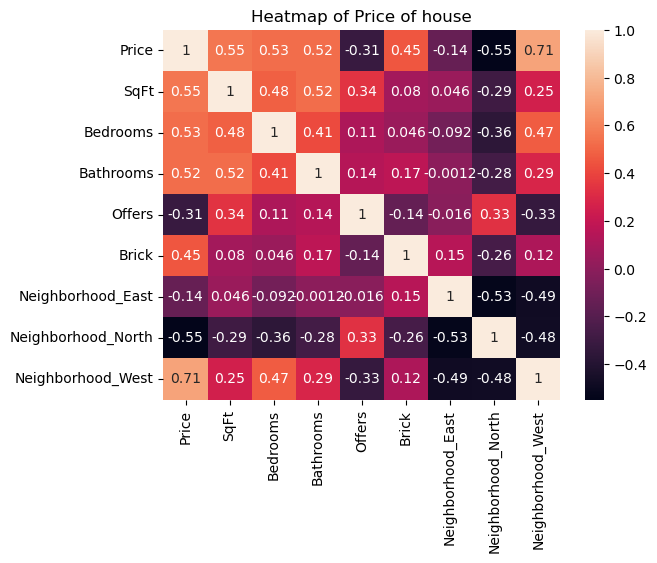

In [31]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Price of house');

# Split data into training and testing sets

In [30]:
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood_East', 'Neighborhood_North', 'Neighborhood_West']]
y = df['Price']
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=SEED)

# Train linear regression model on training data


In [33]:

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# View Coefficient value

In [34]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                    Coefficient value
SqFt                        64.281914
Bedrooms                  3333.643707
Bathrooms                 6529.114217
Offers                   -9049.533720
Brick                    17432.287825
Neighborhood_East        -8589.795338
Neighborhood_North       -5508.877603
Neighborhood_West        14098.672941


# Make prediction using trained model on new set of predictor variable values

In [35]:
new_data = {'SqFt': 2000, 'Bedrooms': 1, 'Bathrooms': 1, 'Offers': 1, 'Brick': 1, 'Neighborhood_East': 1, 'Neighborhood_North': 0, 'Neighborhood_West': 0}
new_data_df = pd.DataFrame.from_dict(new_data, orient='index').T
prediction = regressor.predict(new_data_df)
print(f'Prediction for the house: ${prediction[0]:,.2f}')

Prediction for the house: $131,676.94


# Actual and predicted house price

In [36]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual      Predicted
55   125700  114491.230566
40   106600   95823.370287
19   167200  159898.839486
31   112300  131071.350155
98   145500  153986.439067
56   140900  138987.839939
69   165600  147035.767822
104   82300   94507.082590
81   184300  177374.504182
26   137000  135364.100518
94   160600  168967.789598
27    99300   99106.948176
64   130300  132080.522629
4    119800  124227.751516
96   133300  144155.144728
113  115700  129855.194093
36   117500  110424.966651
80   143400  136467.420435
125  113500  122638.530233
84    90500   78233.944039
18   111400  122255.126014
10   132500  128702.733765
118  150200  126641.098413
11   123000  124133.517604
105  146900  166913.095217
45   103200   97128.424951
70   166700  152777.763173
78   121300  120779.555035
47    90300   88488.400787
0    114300  101558.676693
12   102600   97588.000325
42   105600  105365.525690
126  149900  157944.276740
24   156400  159185.769854
67   151900  121776.022999
111  114900  101425.498749
8

# Evaluate model performance on test data using mean absolute error, mean squared error, root mean squared error, and R-squared

In [37]:
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean absolute error: ${mae:,.2f}')
print(f'Mean squared error: ${mse:,.2f}')
print(f'Root mean squared error: ${rmse:,.2f}')
print(f'R-squared: {r2:.2f}')

Mean absolute error: $8,647.87
Mean squared error: $121,379,993.01
Root mean squared error: $11,017.26
R-squared: 0.81


## We can see that the value of the RMSE is 11,017.26 which means that our model might get its prediction wrong by adding or subtracting 11,017.26 from the actual value